# Задание 1. Метод линейной интерполяции.

## Описание метода.

Рассмотрим смешанную краевую задачу для уравнения

 $y^{\prime \prime}+p(x) y^{\prime}+q(x) y+f(x)=0, \quad 0<x<l .$


Граничные условия возьмем в виде

$$
\begin{gathered}
y(0)=a, \\
y^{\prime}(l)+\alpha y(l)=b .
\end{gathered}
$$  

Выберем любые два значения $\lambda=\lambda_{1}, \lambda=\lambda_{2}$ и решим две задачи Коши с начальными условиями:

$$
\begin{aligned}
&y_{1}(0)=a, y_{1}^{\prime}(0)=\lambda_{1} \\
&y_{2}(0)=a, y_{2}^{\prime}(0)=\lambda_{2}
\end{aligned}
$$

Полученные решения обозначим как $y=y_{1}(x)$ и $y=y_{2}(x)$. Найдем соответствующие значения левых частей в граничном условии.  

\begin{aligned}
&y_{1}^{\prime}(l)+\alpha y_{1}(l)=b_{1} \\
&y_{2}^{\prime}(l)+\alpha y_{2}(l)=b_{2}
\end{aligned}

Теперь значение недостающего начального условия $y^{\prime}(0)=\lambda$ можно найти с помощью линейной интерполяции:

$$
\frac{\lambda-\lambda_{1}}{\lambda_{2}-\lambda_{1}}=\frac{b-b_{1}}{b_{2}-b_{1}} \text {, T.e. } \lambda=\lambda_{1}+\left(\lambda_{2}-\lambda_{1}\right) \frac{b-b_{1}}{b_{2}-b_{1}} .
$$

Полученное значение $\lambda$ и будет являться недостающим начальным условием. Объясняется это линейностью задачи. Как известно, дифференциальное уравнение имеет общее решение

$$
y(x)=c_{1} u_{1}(x)+c_{2} u_{2}(x)+y_{n}(x),
$$

где $u_{1}(x)$ и $u_{2}(x)$ - линейно-независимые решения однородного уравнения (при $f(x) \equiv 0)$, а $y_{n}(x)$ - какое-либо решение неоднородного уравнения (частное решение неоднородного уравнения). Удовлетворяя левому граничному условию, в общем решении останется одна неизвестная постоянная, которая входит в выражение для $y(x)$ линейным образом. Проведя в плоскости $(\lambda, b)$ прямую, проходящую через две точки $\left(\lambda_{1}, b_{1}\right)$ и $\left(\lambda_{2}, b_{2}\right)$ при заданном значении $b$ мы однозначно найдем точное значение $\lambda$.  

Теперь таблицу значений функции $y(x)$ (и ее производной) можно найти интерполяцией $y(x)=y_{1}(x)+\left[y_{1}(x)-y_{1}(x)\right] \cdot \frac{\lambda-\lambda_{1}}{\lambda_{2}-\lambda_{1}}$.

Однако на практике, жертвуя машинным временем, обычно проводят третий расчет задачи Коши с условиями
$$
y(0)=a, \quad y^{\prime}(0)=\lambda .
$$  

Замечание.

 На практике обычно выбирают простейшие значения $\lambda$, например $\lambda_{1}=1$ и $\lambda_{2}=0$. При этом, если само уравнение является однородным, т.е. $f(x) \equiv 0$, и граничное условие так же однородное, $y(0)=0$, то решение имеет вид $y_{2}(x) \equiv 0, b_{2}=0$. Тогда второй расчет (при $\lambda_{2}=0$ ) нет необходимости производить и формула даст ответ в виде

$$
\lambda=\lambda_{1} \frac{b}{b_{1}} .
$$

Поэтому, если предложено решить однородное уравнение, то следует посмотреть, есть ли однородное граничное условие и если оно есть, то начинать расчет следует от этой границы! Эта рекомендация остается в силе и для других методов решения краевых задач.



##Задание.

Решить краевую задачу:

$$
\begin{aligned}
&y^{\prime \prime}+(1-4 x) y^{\prime}+8 y=5, \quad 0<x<1 \\
&y^{\prime}(0)-y(0)=0 ; \quad y(1)=0
\end{aligned}
$$ 


Заменой $ x_1 = 1 - x$ сведем задачу к рассмотренной

In [3]:
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
# по умолчанию solve_ivp использует алгоритм RK45.
def f(t, y):
    return y[1], 5 - 8 * y[0] - y[1] * (3 - 4 * t) 

result1 = solve_ivp(f, (0, 1), [0, 0], rtol=1e-10)
result2 = solve_ivp(f, (0, 1), [0, 1], rtol=1e-10)
b1 = result1.y[1][result1.y[1].shape[0] - 1] - result1.y[0][result1.y[0].shape[0] - 1]
b2 = result2.y[1][result2.y[1].shape[0] - 1] - result2.y[0][result2.y[0].shape[0] - 1]
lmb0 = -b1 / (b2 - b1)
result0 = solve_ivp(f, (0, 1), [0, lmb0], rtol=1e-10)
print(result0.y[1][result0.y[1].shape[0] - 1] - result0.y[0][result0.y[0].shape[0] - 1])
plt.plot(1 - result0.t, result0.y[0])

-1.72841487788844e-08


# Задание 2. Метод дифференциальной прогонки.



## Описание метода.



Суть метода прогонки заключается в следующем. Основываясь на
форме граничного условия в начальной точке, выводится обыкновенное
дифференциальное уравнение, порядок которого на единицу меньше порядка заданного дифференциального уравнения и коэффициенты которого включают неизвестные функции. Количество таких неизвестных функций равно порядку исходного уравнения. Если выведенное уравнение продифференцировать, то новое уравнение будет иметь тот же порядок, что и заданное. Приравнивая коэффициенты этих двух уравнений, получаем систему дифференциальных уравнений первого порядка, интегрированием которой можно получить неизвестные коэффициенты. В частности, решения в конечной точке совместно с граничными условиями в этой точке составляют полый набор уравнений для нахождения всех граничных значений. Этот этап называется прямой прогонкой. Зная полный набор граничных условий в конечной точке, исходное уравнение
можно проинтегрировать как задачу Коши от начальной до конечной
точки. Таким образом удается избежать итераций.

Рассмотрим граничную задачу, определяемую дифференциальным уравнением
и граничными условиями

$\frac{d^{2} y}{d x^{2}}=p(x) y+q(x)$,

 $\frac{d y(a)}{d x}=\alpha_{00} y(a)+\alpha_{10}$, 
 
 $\frac{d y(b)}{d x}=\beta_{00} y(b)+\beta_{10}$; 
 
 $\alpha_{00}, \beta_{00}, \alpha_{10}, \beta_{10}-$ константы, 
 
 где $p(x)$ и $q(x)$ - непрерывные функциий

Рассмотрим линейное дифференциальное уравнение первого порядка
$$
\frac{d y}{d x}=\alpha_{0}(x) y(x)+\alpha_{1}(x),
$$
и выберем $\alpha_{0}(x)$ и $\alpha_{1}(x)$ так, чтобы $y(x)$ удовлетворяло уравнению. Продифференцировав последнее по $x$, получим

$$
\frac{d^{2} y}{d x^{2}}=\left(d \alpha_{0} / d x\right) y+d \alpha_{1} / d x+\alpha_{0} d y / d x .
$$

Заменив здесь $d y / d x$ выражением, стоящим в правой части, получим

$$
\frac{d^{2} y}{d x^{2}}=\left(d \alpha_{0} / d x+\alpha_{0}^{2}\right) y+d \alpha_{1} / d x+\alpha_{0} \alpha_{1} .
$$

Из сравнения с исходным уравнением получаем следующие уравнения:  

\begin{gathered}
d \alpha_{0}(x) / d x+\alpha_{0}^{2}=p(x) \\
d \alpha_{1}(x) / d x+\alpha_{0}(x) \alpha_{1}(x)=q(x)
\end{gathered}

В качестве первого шага проинтегрируем на отрезке $a<x<b$ эти два уравнения  как задачу Коши, приняв в качестве начальных значений

$$
\alpha_{0}(a)=\alpha_{00}, \quad \alpha_{1}(a)=\alpha_{10},
$$

получим значения $\alpha_{0}(b)$ и $\alpha_{1}(b)$. Подставив найденные значения в дифференциальное уравнение первого порядка, получим 

$$ d y(b) / d x=\alpha_{0}(b) y(b)+\alpha_{1}(b) . $$

С другой стороны, второе граничное условие исходного уравнения при $x=b$ дает

$$ d y(b) / d x=\beta_{00} y(b)+\beta_{10} $$ 


Так как теперь $\alpha_{0}(b)$ и $\alpha_{1}(b)-$ известные величины, уравнения первого порядка на альфа можно разрешить относительно $y(b)$ и $d y(b) / d x$ и получить

\begin{gathered}
y(b)=\left[\beta_{10}-\alpha_{1}(b)\right] /\left[\alpha_{0}(b)-\beta_{00}\right] \\
d y(b) / d x=\left[\beta_{00} \alpha_{1}(b)-\beta_{10} \alpha_{0}(b)\right] /\left[\beta_{00}-\alpha_{0}(b)\right]
\end{gathered}  



Теперь задачу Коши, определяемую исходным уравнением и этими последними и начальными условиями можно проинтегрировать назад от $x=b$. Другая возможность заключается в том, чтобы проинтегрировать дифференциальное уравнение первого порядка, используя предпоследнее выражение в качестве начального условия.  





 ## Задание.

Рассмотрим решение следующей граничной задачи

$$
\begin{gathered}
d^{2} y / d x^{2}=-y+x \cos x \\
\\
d y(0) / d x=3 y(0)+2, \quad d y(\pi / 2) / d x=-5 y(\pi / 2)+2 .
\end{gathered}
$$

Известно точное решение этой задачи


$$
y=-0.73 \cos x-0.441 \sin x+(1 / 4)\left(x^{2} \sin x+x \cos x\right),
$$


откуда


$$
y(\pi / 2)=0.175 \text { и } d y(\pi / 2) / d x=1.122 .
$$


Найдите эти граничные значения, решая задачу методом дифференциальной прогонки. 

In [41]:
import numpy as np
def f(t, y):
    return -1 - y[0]**2, t * np.cos(t) - y[0] * y[1]

result = solve_ivp(f, (0, np.pi / 2), [3, 2], rtol=1e-10)
a0_b, a1_b = result.y[0][-1], result.y[1][-1]
print((2 - a1_b) / (a0_b + 5), (-5 * a1_b - 2 * a0_b) / (-5 - a0_b))

0.1753608077531265 1.1231959612343676


# Задача 3.  Метод Ньютона для непрерывного случая.

## Описание метода Ньютона.


Рассмотрим краевую задачу, определяемую дифференциальным уравнением второго порядка и граничными условиями


$\begin{array}{lc}y(0)=0 &  \\ y(l)=A &  \\ \text { в виде системы двух дифференциальных }\end{array}$

 $$ \left\{\begin{array}{l}d y / d x=u, \\ d u / d x=f(x, y, u) .\end{array}\right. $$


Обозначим недостающее начальное значение производной через $s$ :
$$
d y(0) / d x=u(0)=s .
$$
Задача заключается в том, чтобы найти такое значение $s$, при котором решение задачи Коши с такими начальными удовлетворяет правому граничному условию. Иначе говоря, если решение задачи Коши обозначить через $y(x, s)$ и $u(x, s)$, то требуется найти такое значение $s$, что
$$
y(l, s)-A=\varphi(s)=0 .
$$

В методе Ньютона итерационная формула для $s$ задается в виде

$$
s^{(n+1)}=s^{(n)}-\frac{\varphi\left(s^{(n)}\right)}{d \varphi\left(s^{(n)}\right) / d s}
$$

Или

$$
s^{(n+1)}=s^{(n)}-\frac{y\left(l, s^{(n)}\right)-A}{\partial y\left(l, s^{(n)}\right) / \partial s}
$$ 

Чтобы найти производную $y$ по $s$, продифференцируем систему по $s$ и получим 

\begin{gathered}
d Y / d x=U, \quad d U / d x=(\partial f / \partial y) Y+(\partial f / \partial u) U \\
Y(0)=0, \quad U(0)=1 \\
Y=\partial y / \partial s, \quad U=\partial u / \partial s
\end{gathered}

Итак, получаем алгоритм действий.

1. Выбирается значение $s$ для недостающего начального значения производной. Это приближенное значение $s$ обозначается через $s^{(1)}$.
2. Интегрируется задача Коши  от $x=0$ до $x=l$.
3. Интегрируются уравнения с Y и U от $x=0$ до $x=l$.
4. Значения $y\left(l, s^{(1)}\right)$ и $Y\left(l, s^{(1)}\right)$, подставляются в формулу для $s^{(2)}$, что дает

$$
s^{(2)}=s^{(1)}-\left[y\left(l, s^{(1)}\right)-A\right] / Y\left(l, s^{(1)}\right),
$$

следующее приближение $s^{(2)}$ для недостающего начального значения производной.
5. Шаги $2-4$ повторяются до тех пор, пока величина $s$ не будет найдена с заданной точностью.  
 

##Задание.


Напишите программу, которая решает нелинейное уравнение Пуассона:


$$
\phi^{\prime \prime}(x)=e^{\phi(x)}-n(x), \quad \text { где } n(x)=1+e^{-3(x-5)^{2}}  
$$


в области $0<=x<=10$ с граничными условиями $\phi(0)=\phi(10)=0 .$



 ### Задача была решена в D1

# Задача 4.  Метод Ньютона в конечно-разностном случае.


Напишите программу, которая решает нелинейное уравнение Пуассона:


$$
\phi^{\prime \prime}(x)=e^{\phi(x)}-n(x), \quad \text { где } n(x)=1+e^{-3(x-5)^{2}}  
$$


в области $0<=x<=10$ с граничными условиями $\phi(0)=\phi(10)=0 .$

Используйте решение методом Ньютона системы разностных уравнений. Для этого дискретизуйте дифференциальное уравнение на равномерную решётку $x_{j=1, \ldots, N-1}$, так что значения потенциала в точках $x_{0}=0$ и $x_{N}=10$ зафиксированы граничными условиями, а внутри определяются дискретной версией исходного дифференциального уравнения: $G_{1}=0, G_{2}=0, \ldots, G_{N-1}=0$, где

$$
G_{j}=\frac{\phi_{j+1}-2 \phi_{j}+\phi_{j-1}}{\delta x^{2}}-e^{\phi_{j}}+n\left(x_{j}\right)=0
$$

Используйте метод Ньютона (можно написать самостоятельно, можно использовать scipy) для того, чтобы найти решение этой системы. Сколько итераций нужно, чтобы получить решение с $10ю$ значащими цифрами?

In [1]:
from scipy.optimize import root
h = 0.1
N = int(10/h)
def func(phi):
    # phi represent ODE solution without border points, len(phi) = N-2
    G = np.zeros_like(phi)
    G[0] = phi[1] - 2 * phi[0] - h**2 * (np.e**(phi[0]) - (1 + np.e**(-3*((0+1)*h - 5)**2)))
    for i in range(1, N - 3):
        G[i] =  phi[i+1] - 2 * phi[i] + phi[i-1] - h**2 * (np.e**(phi[i]) - (1 + np.e**(-3*((i+1)*h - 5)**2)))
    G[N-3] = phi[N-4] - 2 * phi[N-3] - h**2 * (np.e**(phi[N-3]) - (1 + np.e**(-3*((N-3+1)*h - 5)**2)))
    return G

In [2]:
x0 = np.zeros(N-2)
res = root(func, x0, tol=1e-10)
print(res.nfev)
plt.plot(res.x)

NameError: name 'np' is not defined

# Задача 5. Метод квазилинеаризации.

##Описание метода.

Рассмотрим нелинейное дифференциальное уравнение второго порядка

$$
\begin{gathered}
y^{\prime \prime}=f\left(x, y, y^{\prime}\right) \\
y(0)=0, \quad y(L)=A,
\end{gathered}
$$


где символами $y^{\prime}$ и $y^{\prime \prime}$ обозначены соответственно $d y / d x$ и $d^{2} y / d^{2} x$.
Перепишем уравнение в виде

$$
\varphi\left(x, y, y^{\prime}, y^{\prime \prime}\right)=y^{\prime \prime}-f\left(x, y, y^{\prime}\right)=0 .
$$

Чтобы получить рекуррентное соотношение, обозначим $n$ - ю и $(n+1)$ - ю итерации через $y_{n}$ и $y_{n+1}$ и потребуем, чтобы для итераций выполнялось условие $\varphi=0$. Это позволяет написать для $n$ - й итерации
$$
y_{n}^{\prime \prime}-f\left(x, y, y^{\prime}\right)=0 .
$$  

Для $(n+1)$ - й итерации получаем

$$
\begin{aligned}
\varphi\left(x_{n+1},\right.&\left.y_{n+1}, y_{n+1}^{\prime}, y_{n+1}^{\prime \prime}\right)=\varphi\left(x_{n}, y_{n}, y_{n}^{\prime}, y_{n}^{\prime \prime}\right)+\\
&+(\partial \varphi / \partial y)_{n}\left(y_{n+1}-y_{n}\right)+\left(\partial \varphi / \partial y^{\prime}\right)\left(y_{n+1}^{\prime}-y_{n}^{\prime}\right)+\\
+&\left(\partial \varphi / \partial y^{\prime \prime}\right)_{n}\left(y_{n+1}^{\prime \prime}-y_{n}^{\prime \prime}\right)+\ldots=0
\end{aligned}
$$  

или

$$
-(\partial f / \partial y)_{n}\left(y_{n+1}-y_{n}\right)-\left(\partial f / \partial y^{\prime}\right)_{n}\left(y_{n+1}^{\prime}-y_{n}^{\prime}\right)+y_{n+1}^{\prime \prime}-y_{n}^{\prime \prime}=0
$$  

В итоге получаем, что на каждом шаге итерации надо решать краевую задачу.

\begin{aligned}
&y_{n+1}^{\prime \prime}-\left(\partial f / \partial y^{\prime}\right)_{n} y_{n+1}^{\prime}-(\partial f / \partial y)_{n} y_{n+1}= \\
&=f\left(x, y_{n}, y_{n}^{\prime}\right)-(\partial f / \partial y)_{n} y_{n}-\left(\partial f / \partial y^{\prime}\right)_{n} y_{n}^{\prime}
\end{aligned}  

$$y_{n+1}(0)=0, \quad y_{n+1}(L)=A$$  





## Задание.


Напишите программу, которая решает нелинейное уравнение Пуассона:


$$
\phi^{\prime \prime}(x)=e^{\phi(x)}-n(x), \quad \text { где } n(x)=1+e^{-3(x-5)^{2}}  
$$


в области $0<=x<=10$ с граничными условиями $\phi(0)=\phi(10)=0 .$


Используйте описанный выше метод квазилинеаризации.

Линейную краевую задачу будем решать методом линейной интерполяции.

In [139]:
N = 100
grid = np.linspace(0, 10, N)
h = 10 / N
def euler_solver(yn, y00, y10):
    y0 = np.zeros_like(grid)
    y1 = np.zeros_like(grid)
    y0[0] = y00
    y1[0] = y10
    for i in range(0, grid.shape[0]-1):
        y0[i+1] = y0[i] + h * y1[i]
        y1[i+1] = y1[i] + h * (np.e**(yn[i])* (y0[i] - yn[i]) + np.e**(yn[i]) - (1 + np.e**(-3*(i*h-5)**2)))
    return y0
        
def make_step(cr_y):
        u0 = euler_solver(cr_y, 0, 0)
        v0 = euler_solver(cr_y, 0, 1)
        b1 = u0[-1]
        b2 = v0[-1]
        lmb0 =  - b1 / (b2 - b1)
        return euler_solver(cr_y, 0, lmb0)


4


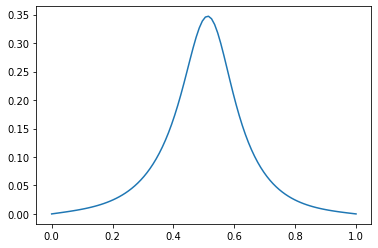

In [147]:
y = np.zeros_like(grid)
n_iter=0
while np.max(np.abs(y - make_step(y)))>1e-10:
    n_iter+=1
    y = make_step(y)
print(n_iter)
plt.plot(grid*h, y)